In [13]:
import pandas as pd

df = pd.read_csv("prediksi_pengunjung_borobudur.csv")
df

,hari_type,musim,suhu_rata_rata,ada_event_budaya,harga_tiket_ribu,jumlah_pengunjung
0,weekend,hujan,29.1,ya,86.8,37158
1,weekday,kemarau,22.3,tidak,98.9,25140
2,weekday,kemarau,29.4,ya,71.9,43760
3,weekend,kemarau,30.4,tidak,99.9,32368
4,weekday,kemarau,22.6,tidak,83.3,21171
...,...,...,...,...,...,...
295,weekday,hujan,26.9,ya,98.5,26379
296,weekday,kemarau,33.5,ya,93.0,32794
297,weekday,kemarau,24.8,tidak,85.7,21562
298,weekend,kemarau,25.6,tidak,78.4,31919


In [3]:
df.shape

(300, 6)

In [5]:
df.columns

Index(['hari_type', 'musim', 'suhu_rata_rata', 'ada_event_budaya',
       'harga_tiket_ribu', 'jumlah_pengunjung'],
      dtype='object')

In [6]:
df.dtypes

hari_type             object
musim                 object
suhu_rata_rata       float64
ada_event_budaya      object
harga_tiket_ribu     float64
jumlah_pengunjung      int64
dtype: object

In [8]:
df.tail()

,hari_type,musim,suhu_rata_rata,ada_event_budaya,harga_tiket_ribu,jumlah_pengunjung
295,weekday,hujan,26.9,ya,98.5,26379
296,weekday,kemarau,33.5,ya,93.0,32794
297,weekday,kemarau,24.8,tidak,85.7,21562
298,weekend,kemarau,25.6,tidak,78.4,31919
299,weekday,kemarau,25.0,tidak,52.6,26931


In [9]:
df.head()

,hari_type,musim,suhu_rata_rata,ada_event_budaya,harga_tiket_ribu,jumlah_pengunjung
0,weekend,hujan,29.1,ya,86.8,37158
1,weekday,kemarau,22.3,tidak,98.9,25140
2,weekday,kemarau,29.4,ya,71.9,43760
3,weekend,kemarau,30.4,tidak,99.9,32368
4,weekday,kemarau,22.6,tidak,83.3,21171


In [10]:
df.sample()

,hari_type,musim,suhu_rata_rata,ada_event_budaya,harga_tiket_ribu,jumlah_pengunjung
119,weekday,hujan,34.0,tidak,92.2,15691


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hari_type          300 non-null    object 
 1   musim              300 non-null    object 
 2   suhu_rata_rata     300 non-null    float64
 3   ada_event_budaya   300 non-null    object 
 4   harga_tiket_ribu   300 non-null    float64
 5   jumlah_pengunjung  300 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 14.2+ KB


In [12]:
df.describe()

,suhu_rata_rata,harga_tiket_ribu,jumlah_pengunjung
count,300.000000,300.000000,300.000000
mean,27.067667,75.008000,24662.236667
std,4.248965,14.608945,7778.132529
min,20.100000,50.200000,10359.000000
25%,23.100000,61.875000,18732.000000
50%,26.800000,74.750000,23313.000000
75%,30.725000,86.725000,29500.750000
max,35.000000,100.000000,50000.000000


In [12]:
df["ada_event_budaya"].value_counts()

NameError: name 'df' is not defined

In [11]:
df["musim"].value_counts()

NameError: name 'df' is not defined

In [10]:
df["hari_type"].value_counts()

NameError: name 'df' is not defined

In [13]:
df.isna().sum()

hari_type            0
musim                0
suhu_rata_rata       0
ada_event_budaya     0
harga_tiket_ribu     0
jumlah_pengunjung    0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

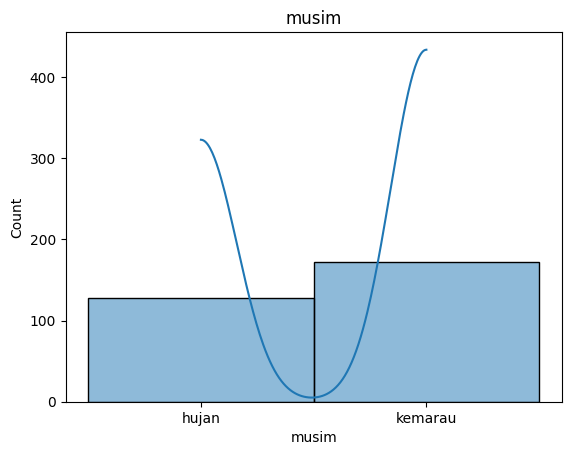

In [44]:
 import matplotlib.pyplot as plt
 import seaborn as sns
 sns.histplot(df["musim"], kde=True)
 plt.title("musim")
 plt.show()

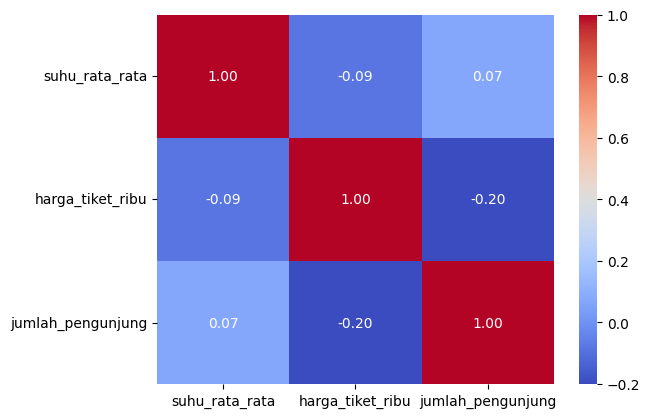

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

kolom_angka = df[["suhu_rata_rata","harga_tiket_ribu","jumlah_pengunjung"]]
corr = kolom_angka.corr()

sns.heatmap(corr,annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["hari_type","musim","suhu_rata_rata","ada_event_budaya","harga_tiket_ribu"]]
y = df["jumlah_pengunjung"]

numeric_columns = ["suhu_rata_rata", "harga_tiket_ribu"]
categorical_columns = ["hari_type", "musim", "ada_event_budaya"]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("OHE", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ]
)

model_linear = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", LinearRegression())
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_linear.fit(X_train, y_train)

y_pred = model_linear.predict(X_test)

print("R2 Score :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))

R2 Score : 0.7660968076281232
MAE : 2656.409625940078
MSE : 10542360.105586698


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["hari_type","musim","suhu_rata_rata","ada_event_budaya","harga_tiket_ribu"]]
y = df["jumlah_pengunjung"]

numeric_columns = ["suhu_rata_rata", "harga_tiket_ribu"]
categorical_columns = ["hari_type", "musim", "ada_event_budaya"]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("OHE", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ]
)

model_tree = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("regressor", DecisionTreeRegressor(
            random_state=42,
            max_depth=6
        ))
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)

print("R2 Score :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))


R2 Score : 0.7076721764409187
MAE : 2861.7251010101013
MSE : 13175643.964459144


In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["hari_type","musim","suhu_rata_rata","ada_event_budaya","harga_tiket_ribu"]]
y = df["jumlah_pengunjung"]

numeric_columns = ["suhu_rata_rata", "harga_tiket_ribu"]
categorical_columns = ["hari_type", "musim", "ada_event_budaya"]

preprocessing = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric_columns),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ]
)

model_forest = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("regressor", RandomForestRegressor(
            n_estimators=200,
            max_depth=8,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_forest.fit(X_train, y_train)
y_pred = model_forest.predict(X_test)

print("R2 Score :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))


R2 Score : 0.751707840795216
MAE : 2702.795686707204
MSE : 11190891.954859944


In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_linear,X_train,y_train,cv=5,scoring="r2")
print("Scores : ",scores)
print("Mean Scores : ", scores.mean())

Scores :  [0.82560719 0.77613476 0.84790633 0.86659019 0.82561758]
Mean Scores :  0.8283712112631211


In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_tree,X_train,y_train,cv=5,scoring="r2")
print("Scores : ",scores)
print("Mean Scores : ", scores.mean())

Scores :  [0.5698266  0.7270609  0.75731792 0.81246308 0.71203549]
Mean Scores :  0.7157407957597149


In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_forest,X_train,y_train,cv=5,scoring="r2")
print("Scores : ",scores)
print("Mean Scores : ", scores.mean())

Scores :  [0.79126313 0.79084276 0.80025695 0.82816272 0.80794017]
Mean Scores :  0.8036931454664167


In [40]:
import joblib 

joblib.dump(model_linear,"model_linear.joblib")

['model_linear.joblib']

In [55]:
import joblib 
import pandas as pd 

model = joblib.load("model_linear.joblib")

data_baru = pd.DataFrame(
    [["weekend", "kemarau", 29, "tidak", 63]],
    columns=["hari_type", "musim", "suhu_rata_rata", "ada_event_budaya", "harga_tiket_ribu"]
)
prediksi = model.predict(data_baru)[0] 
print(f"Model memprediksi jumlah pengunjung : {prediksi:.0f}")

Model memprediksi jumlah pengunjung : 33272
